In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, Embedding
from tensorflow.keras.models import Model

In [6]:
df = pd.read_csv('spam.csv',encoding = 'ISO-8859-1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1, inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.columns = [ 'labels', 'data']

In [12]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['b_labels'] = df['labels'].map({'ham':0, 'spam': 1})
Y = df['b_labels'].values

In [14]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'],Y,test_size=0.33)

In [32]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words = MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [33]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('# of tokens:', V)

# of tokens: 7239


In [34]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1]
data_train.shape

(3733, 162)

In [35]:
data_test = pad_sequences(sequences_test, maxlen =T)
data_test.shape

(1839, 162)

In [36]:
D = 20

M = 15

i = Input(shape=(T,))
x = Embedding(V+1,D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)
model = Model(i,x)

In [37]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer= 'adam',
    metrics = ['accuracy']
)
r = model.fit(
    data_train, Ytrain,
    epochs=10,
    validation_data = (data_test, Ytest)
)

Epoch 1/10
117/117 [==============================] - 22s 189ms/step - loss: 0.4932 - accuracy: 0.8296 - val_loss: 0.3569 - val_accuracy: 0.8673
Epoch 2/10
117/117 [==============================] - 21s 181ms/step - loss: 0.3301 - accuracy: 0.8653 - val_loss: 0.3108 - val_accuracy: 0.8673
Epoch 3/10
117/117 [==============================] - 17s 144ms/step - loss: 0.2918 - accuracy: 0.8653 - val_loss: 0.2820 - val_accuracy: 0.8673
Epoch 4/10
117/117 [==============================] - 16s 140ms/step - loss: 0.2549 - accuracy: 0.8653 - val_loss: 0.2387 - val_accuracy: 0.8673
Epoch 5/10
117/117 [==============================] - 16s 138ms/step - loss: 0.2066 - accuracy: 0.8653 - val_loss: 0.1907 - val_accuracy: 0.8673
Epoch 6/10
117/117 [==============================] - 15s 132ms/step - loss: 0.1372 - accuracy: 0.9807 - val_loss: 0.1191 - val_accuracy: 0.9788
Epoch 7/10
117/117 [==============================] - 15s 131ms/step - loss: 0.0823 - accuracy: 0.9930 - val_loss: 0.0881 - val_ac

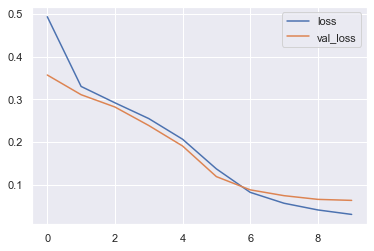

In [39]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

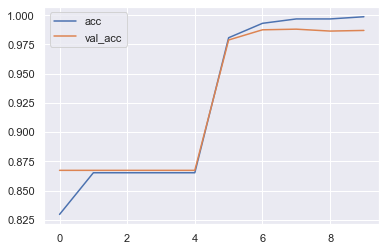

In [38]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()